# <font color=red> Timpaweap 1st Order Trend Plots


# Introduction:
This Program will create bar charts, and tothers to build first order analysis of data. This will show general trends with the data going latterally and vertically in these teepees. The Sampling location can be seen in the following image:
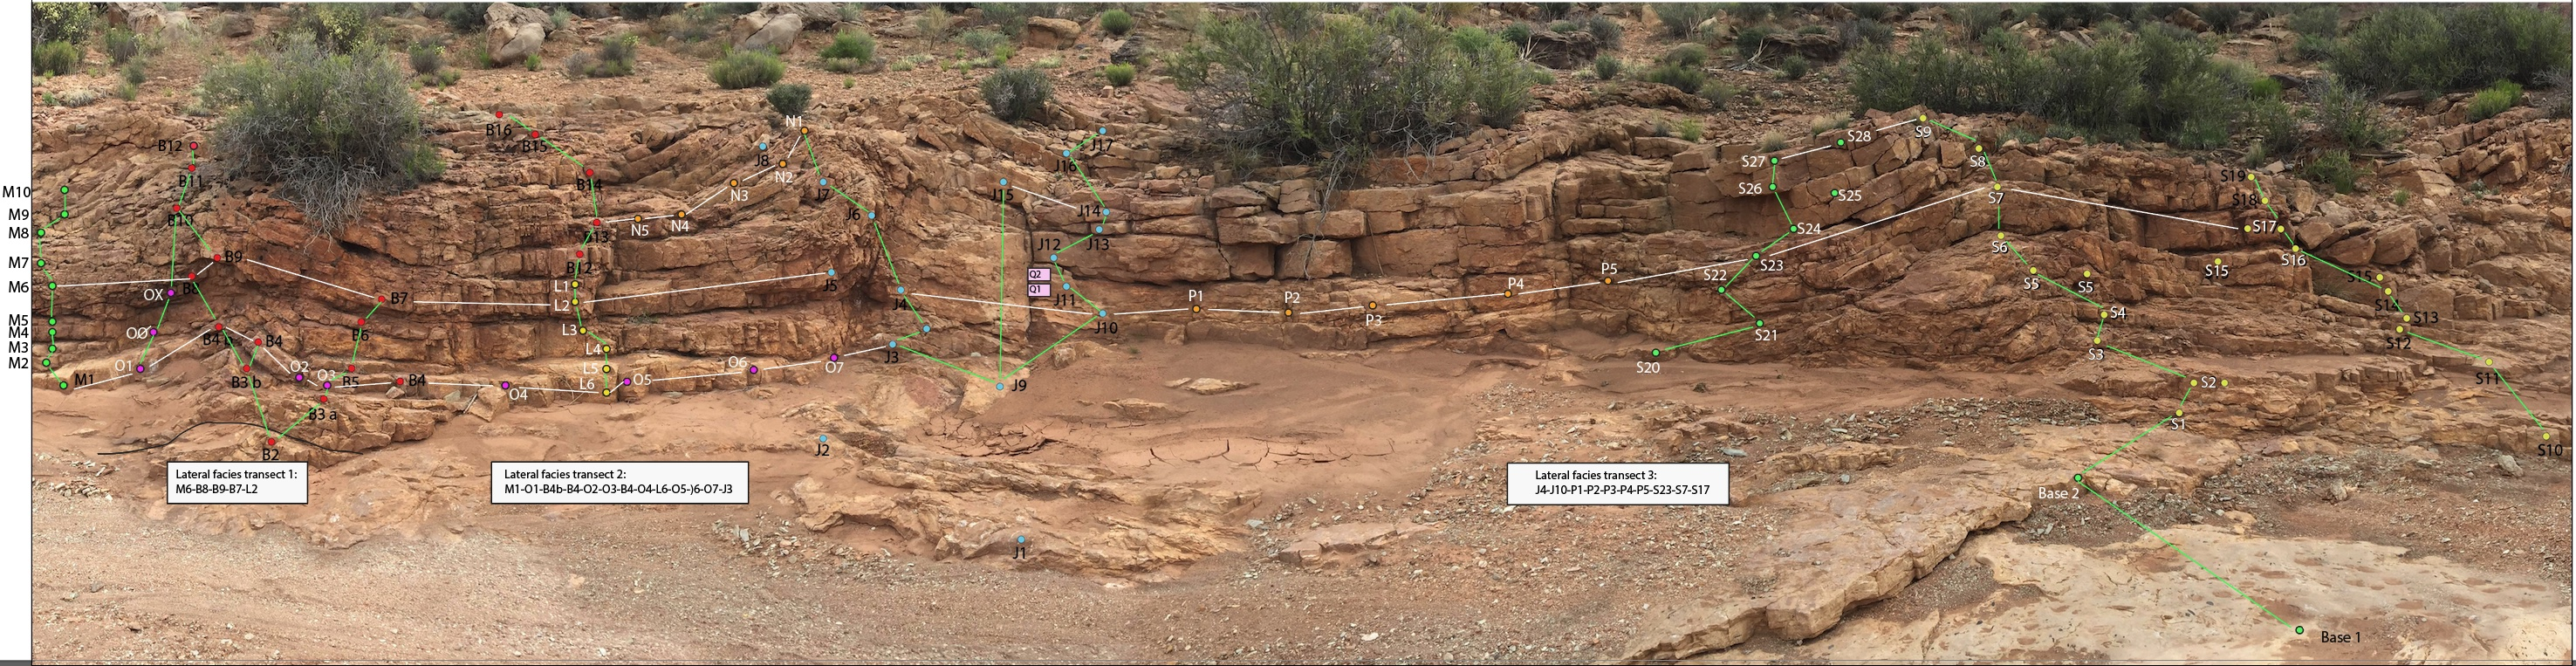

This is in preparation for the Mount Joy Carbonate conference in August of 2022.

For questions contact:

    Sarah Naone: sarah.n.cronin@byu.edu
    
    Jonathon Sevy: jonathonsevy@protonmail.com
    
    Scott Ritter: 

*The following code will import the python packages that will be used. Then we stipulate the display and save resolution for the figures.*

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#Fix me dFthinSectionData = pd.read_excel('/Users/sarahcronin/Desktop/BYU_Data.xlsx', sheet_name = 'DepoEnv');
#Fix me dFthinSectionData.set_index('Samples', inplace=True);

#set the figure resolution much higher:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 500

*Import the data*

*Note: The path of the following line should reflect where your data is stored*

In [54]:
#import data
df = pd.read_excel(r'C:\Users\therobe7\OneDrive\SRC_and_Research\MountJoy\TimpoweapDataSheet_v3.xlsx',
                   sheet_name='AllData')
dfLab = pd.read_excel(r'C:\Users\therobe7\OneDrive\SRC_and_Research\MountJoy\TimpoweapDataSheet_v3.xlsx',
                   sheet_name='Labels')
#df = pd.read_excel(r'C:\Users\duckm\OneDrive\OneDrive\SRC_and_Research\MountJoy\TimpoweapDataSheet_v3.xlsx',
#                   sheet_name='AllData')
#df = pd.read_excel(r'C:\Users\duckm\OneDrive\OneDrive\SRC_and_Research\MountJoy\TimpoweapDataSheet_v3.xlsx',
#                   sheet_name='Labels')


*Normalize the data to 100%*, instead of point counts

Append the Labels/indexes to sort and color data by

In [63]:
#normalize dataset to percent of points taken:
#dfNorm = df[["Irregular fenestra", "Horizontal sheetcrack", ""]].divide(df["Correction factor"], axis="index")
dfNorm = df.loc[:,"Irregular fenestra":"Seafloor micrite"].divide(df["Correction factor"], axis="index")
#Append data
dfNorm["Sample"] = df['Sample']
dfNorm['Lateral Sort order'] = dfLab['Lateral Sort order']
dfNorm['Vertical Sort Order'] = dfLab['Vertical Sort Order']
dfNorm['MorphologyV2'] = dfLab['MorphologyV2']
dfNorm['MorphColorV2'] = dfLab['MorphColorV2']

In [42]:
print(dfNorm)

     Irregular fenestra  Horizontal sheetcrack  Interparticle pore space  \
0             19.031142               1.730104                  0.000000   
1              1.779359               0.000000                  0.000000   
2             18.987342               3.797468                  0.316456   
3             23.305085               5.084746                  0.000000   
4             10.555556               1.388889                 11.111111   
..                  ...                    ...                       ...   
116            4.048583               0.000000                  0.000000   
117            0.000000               0.000000                 36.912752   
118            1.915709               0.000000                 36.398467   
119            1.724138               0.000000                 34.482759   
120           28.571429               6.949807                  0.000000   

     Radial ooid  Tangential ooid  Cracked ooid (internally)  \
0       0.000000       

# Lateral Trend Bar Plot
*The following code will take the normalized data and plot it on a bar plots, in lateral order they appear (see image above).*

KeyError: 'Lateral Index'

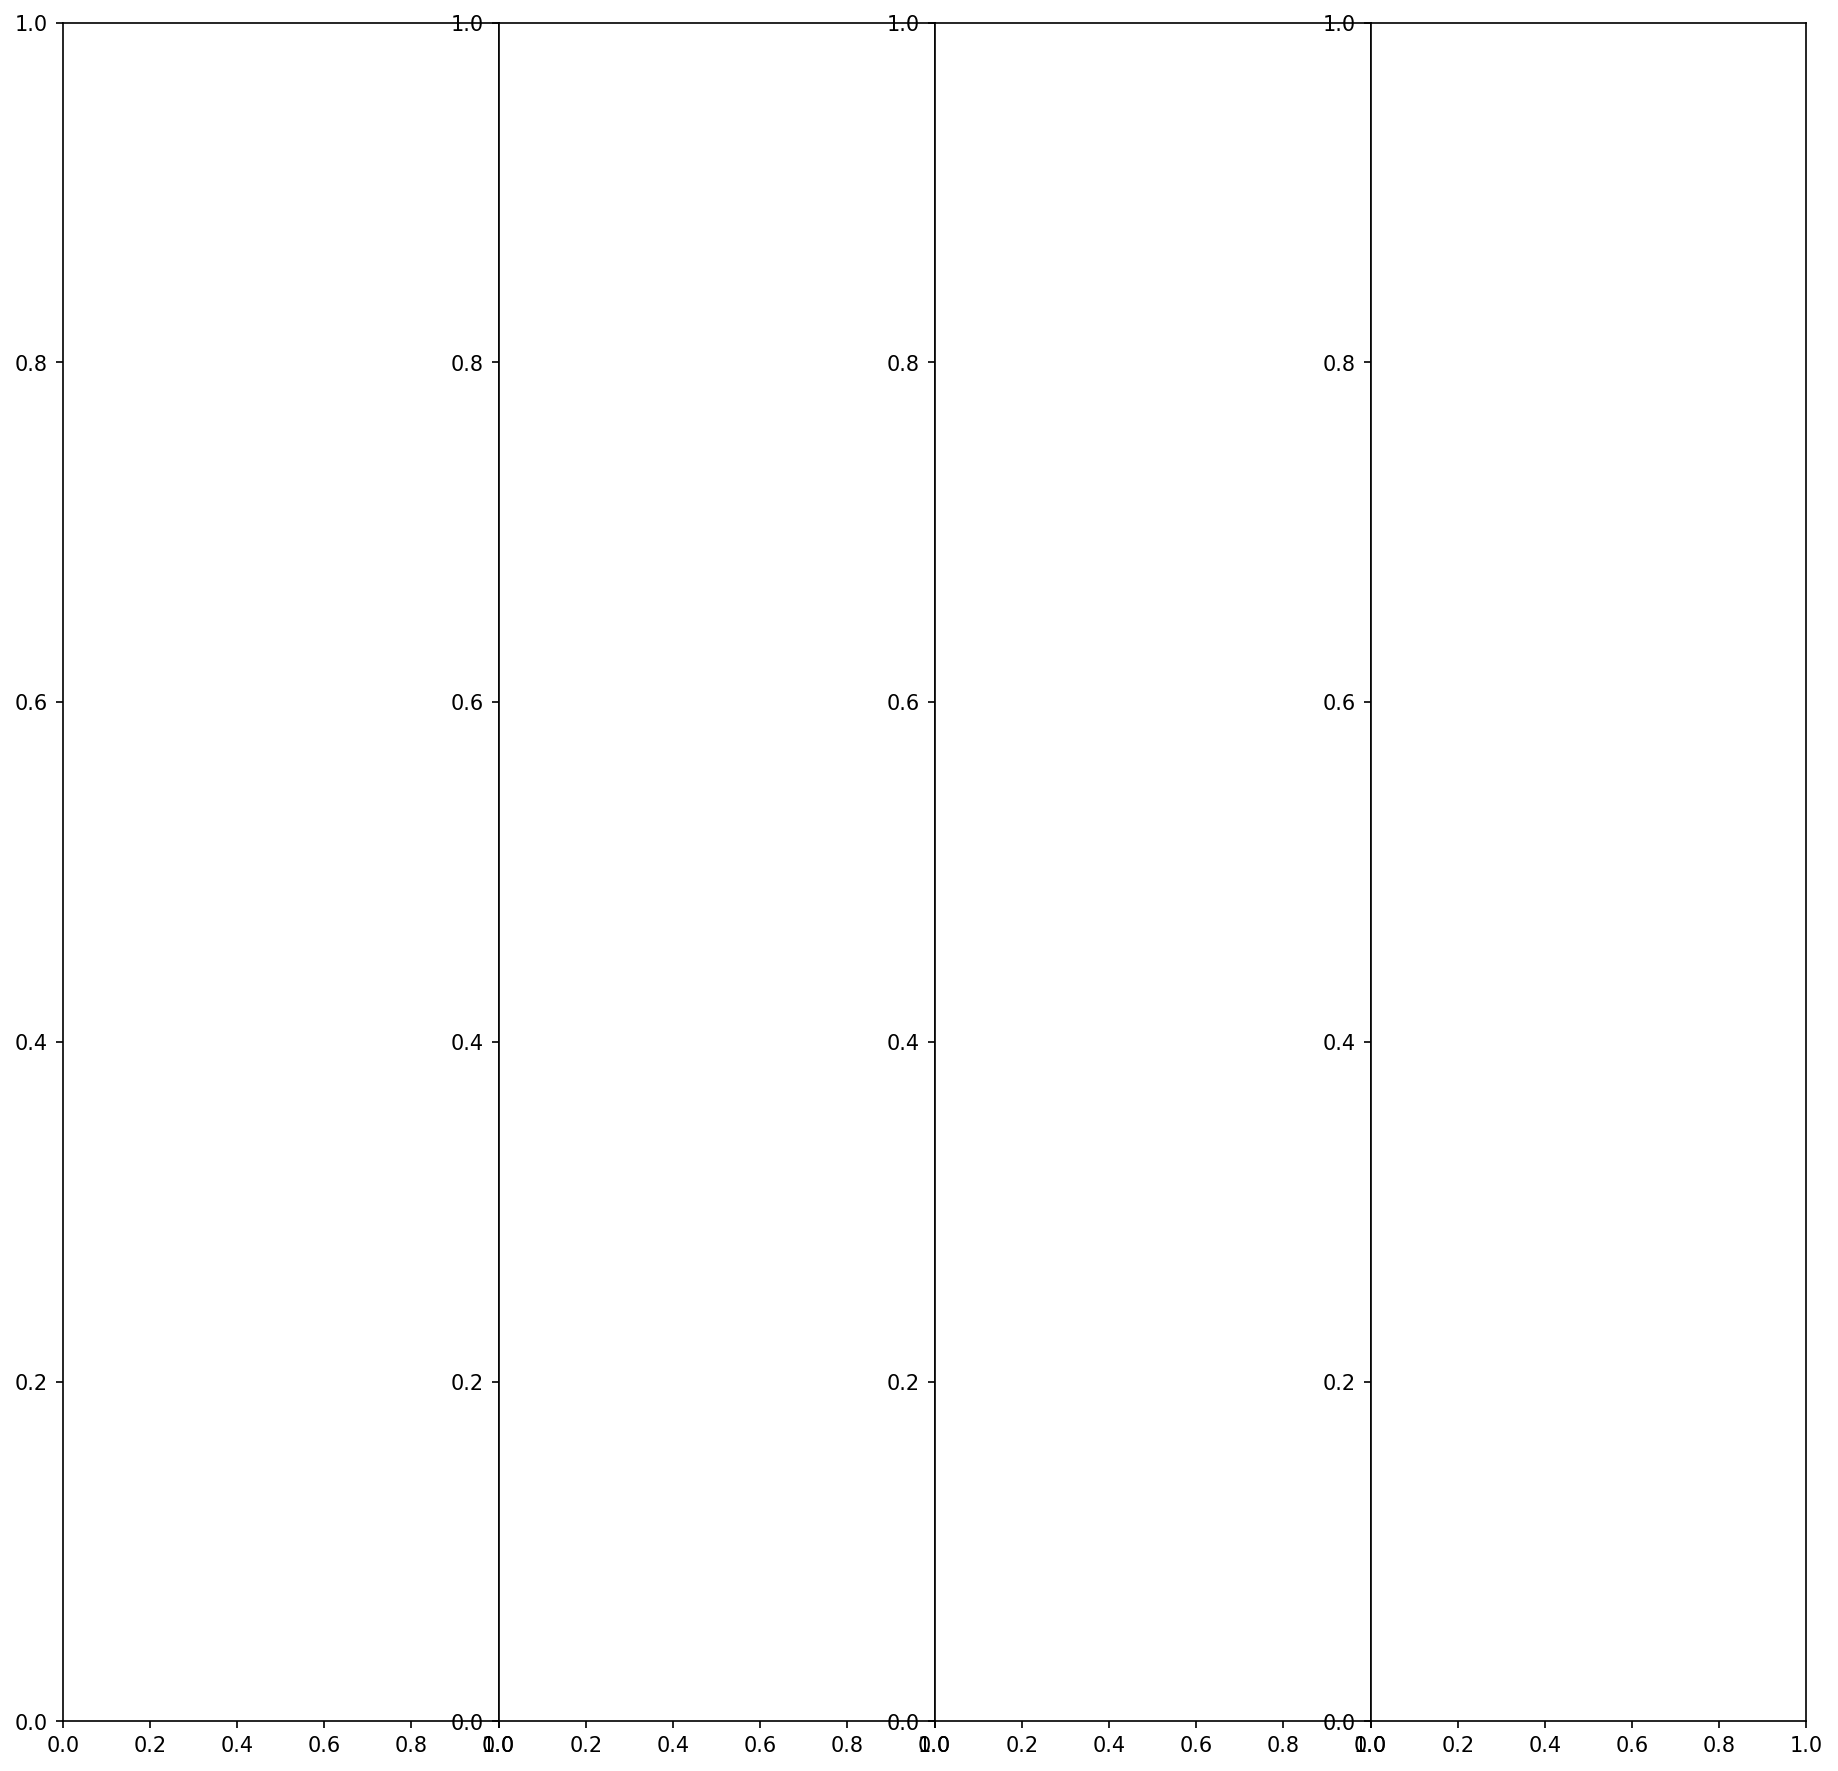

In [43]:
#set up the color groupings
data = {'col':['maroon','firebrick','lightcoral','darkgreen','forestgreen','seagreen','limegreen',\
               'navy','mediumblue','royalblue','cornflowerblue','dodgerblue','lightskyblue','gold',\
               'khaki','palegoldenrod','mediumpurple','rebeccapurple','blueviolet','mediumorchid',\
               'plum','magenta','orangered']}
sym = pd.DataFrame(data)

#set up figure axis
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15,15))

fig.subplots_adjust(wspace=0,)


lat1 = dfNorm.where(df['Lateral Index'].eq(1))
lat2 = dfNorm.where(df['Lateral Index'].eq(2))
lat3 = dfNorm.where(df['Lateral Index'].eq(3))
lat4 = dfNorm.where(df['Lateral Index'].eq(4))
#lat5 = dfNorm.where(dfNorm['Lateral Index'].eq(5))

#drop nans -- this step is not working otherwise this is good to go
lat1d = lat1.dropna(subset=['Sample'])
lat2d = lat2.dropna(subset=['Sample'])
lat3d = lat3.dropna(subset=['Sample'])
lat4d = lat4.dropna(subset=['Sample'])
#lat5d = lat5.dropna(subset=['Sample'])

#order based on sample location
lat1d = lat1d.sort_values(by=['Lateral Sort order'])
lat2d = lat2d.sort_values(by=['Lateral Sort order'])
lat3d = lat3d.sort_values(by=['Lateral Sort order'])
lat4d = lat4d.sort_values(by=['Lateral Sort order'])

#drop sort order columns
lat1d = lat1d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
lat2d = lat2d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
lat3d = lat3d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
lat4d = lat4d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])

#plot
lat1d.plot.bar(x='Sample', stacked=True, ax=ax[0], legend=False, color=sym['col'],\
               title='Lateral set 1', ylabel='Percent')
lat2d.plot.bar(x='Sample', stacked=True,ax=ax[1], legend=False, color=sym['col'],\
               title='Lateral set 2', yticks=[])
lat3d.plot.bar(x='Sample', stacked=True,ax=ax[2], legend=False, color=sym['col'],\
               title='Lateral set 3', yticks=[])
lat4d.plot.bar(x='Sample', stacked=True,ax=ax[3], legend=False, color=sym['col'],\
               title='Lateral set 4', yticks=[])
#lat5d.plot.bar(x='Sample', stacked=True,ax=ax[4], legend=False)

plt.legend(bbox_to_anchor =(1, .46))



In [79]:
#plot Lateral Samples
# fix to samples collected laterally plotBiotite = dFthinSectionData.loc[:, "Biotite"];
# plotBiotite.plot(kind="bar", stacked=True, legend=True, color="brown")
# plt.title("Biotite Percentages")
# plt.xlabel("Samples")
# plt.ylabel("Percentages")



# Vertical Trend Bar Plot
*The following code will take the normalized data and plot it on a bar plots in vertical order, right to left representing bottom to top. The vertical sets  are in latteral order they appear (right to left). There are 10 vertical groups so it is plotted as two groups of 5 sets. See reference image above fore where samples are.*

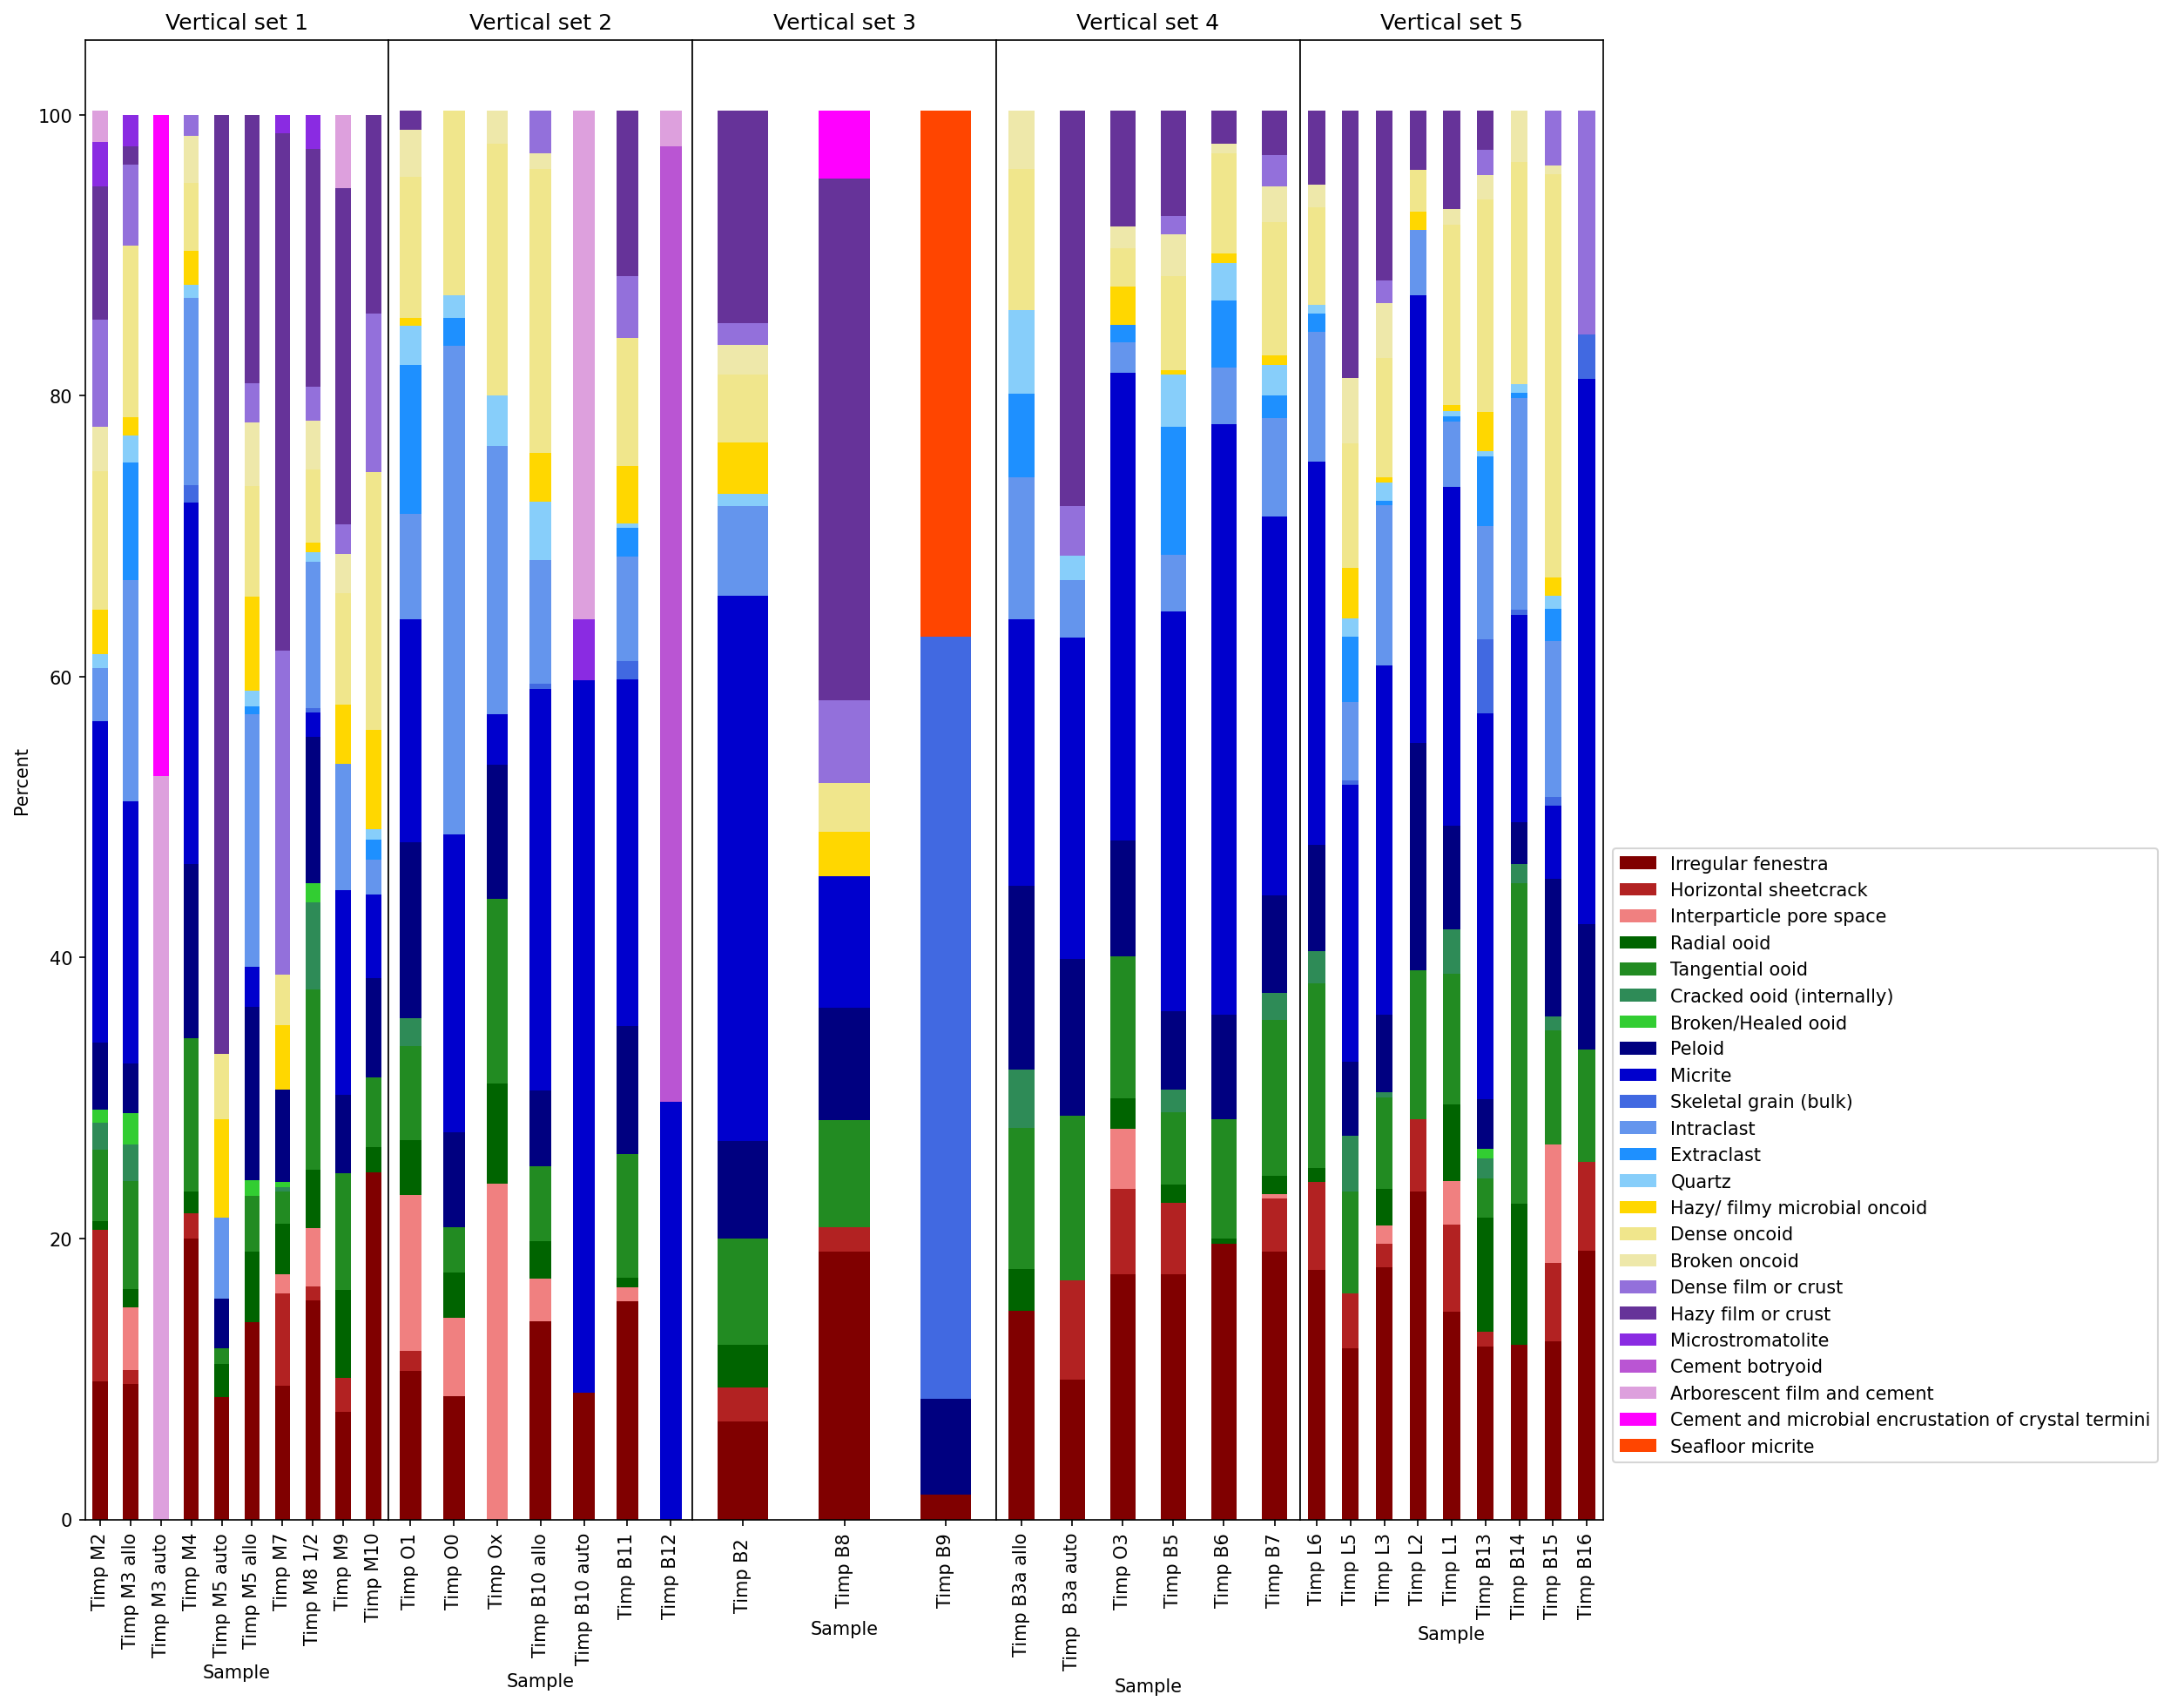

In [22]:
#set up the color groupings
data = {'col':['maroon','firebrick','lightcoral','darkgreen','forestgreen','seagreen','limegreen',\
               'navy','mediumblue','royalblue','cornflowerblue','dodgerblue','lightskyblue','gold',\
               'khaki','palegoldenrod','mediumpurple','rebeccapurple','blueviolet','mediumorchid',\
               'plum','magenta','orangered']}
sym = pd.DataFrame(data)

#set up figure axis
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,15))

fig.subplots_adjust(wspace=0,)


ver1 = dfNorm.where(df['Vertical Index'].eq(1))
ver2 = dfNorm.where(df['Vertical Index'].eq(2))
ver3 = dfNorm.where(df['Vertical Index'].eq(3))
ver4 = dfNorm.where(df['Vertical Index'].eq(4))
ver5 = dfNorm.where(df['Vertical Index'].eq(5))
#vert6 = dfNorm.where(df['Vertical Index'].eq(6))
#vert7 = dfNorm.where(df['Vertical Index'].eq(7))
#vert8 = dfNorm.where(df['Vertical Index'].eq(8))
#vert9 = dfNorm.where(df['Vertical Index'].eq(9))
#vert10 = dfNorm.where(df['Vertical Index'].eq(10))

#drop nans -- this step is not working otherwise this is good to go
ver1d = ver1.dropna(subset=['Sample'])
ver2d = ver2.dropna(subset=['Sample'])
ver3d = ver3.dropna(subset=['Sample'])
ver4d = ver4.dropna(subset=['Sample'])
ver5d = ver5.dropna(subset=['Sample'])
#ver6d = lat5.dropna(subset=['Sample'])
#ver7d = lat5.dropna(subset=['Sample'])
#ver8d = lat5.dropna(subset=['Sample'])
#ver9d = lat5.dropna(subset=['Sample'])
#ver10d = lat5.dropna(subset=['Sample'])

#order based on sample location
ver1d = ver1d.sort_values(by=['Vertical Sort Order'])
ver2d = ver2d.sort_values(by=['Vertical Sort Order'])
ver3d = ver3d.sort_values(by=['Vertical Sort Order'])
ver4d = ver4d.sort_values(by=['Vertical Sort Order'])
ver5d = ver5d.sort_values(by=['Vertical Sort Order'])

#drop sort order columns
ver1d = ver1d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
ver2d = ver2d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
ver3d = ver3d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
ver4d = ver4d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
ver5d = ver5d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])

#plot
ver1d.plot.bar(x='Sample', stacked=True, ax=ax[0], legend=False, color=sym['col'],\
              title='Vertical set 1', ylabel='Percent')
ver2d.plot.bar(x='Sample', stacked=True,ax=ax[1], legend=False, color=sym['col'],\
               title='Vertical set 2', yticks=[])
ver3d.plot.bar(x='Sample', stacked=True,ax=ax[2], legend=False, color=sym['col'],\
               title='Vertical set 3', yticks=[])
ver4d.plot.bar(x='Sample', stacked=True,ax=ax[3], legend=False, color=sym['col'],\
               title='Vertical set 4', yticks=[])
ver5d.plot.bar(x='Sample', stacked=True,ax=ax[4], legend=False, color=sym['col'],\
               title='Vertical set 5', yticks=[])

plt.legend(bbox_to_anchor=(1, .46))
plt.show()




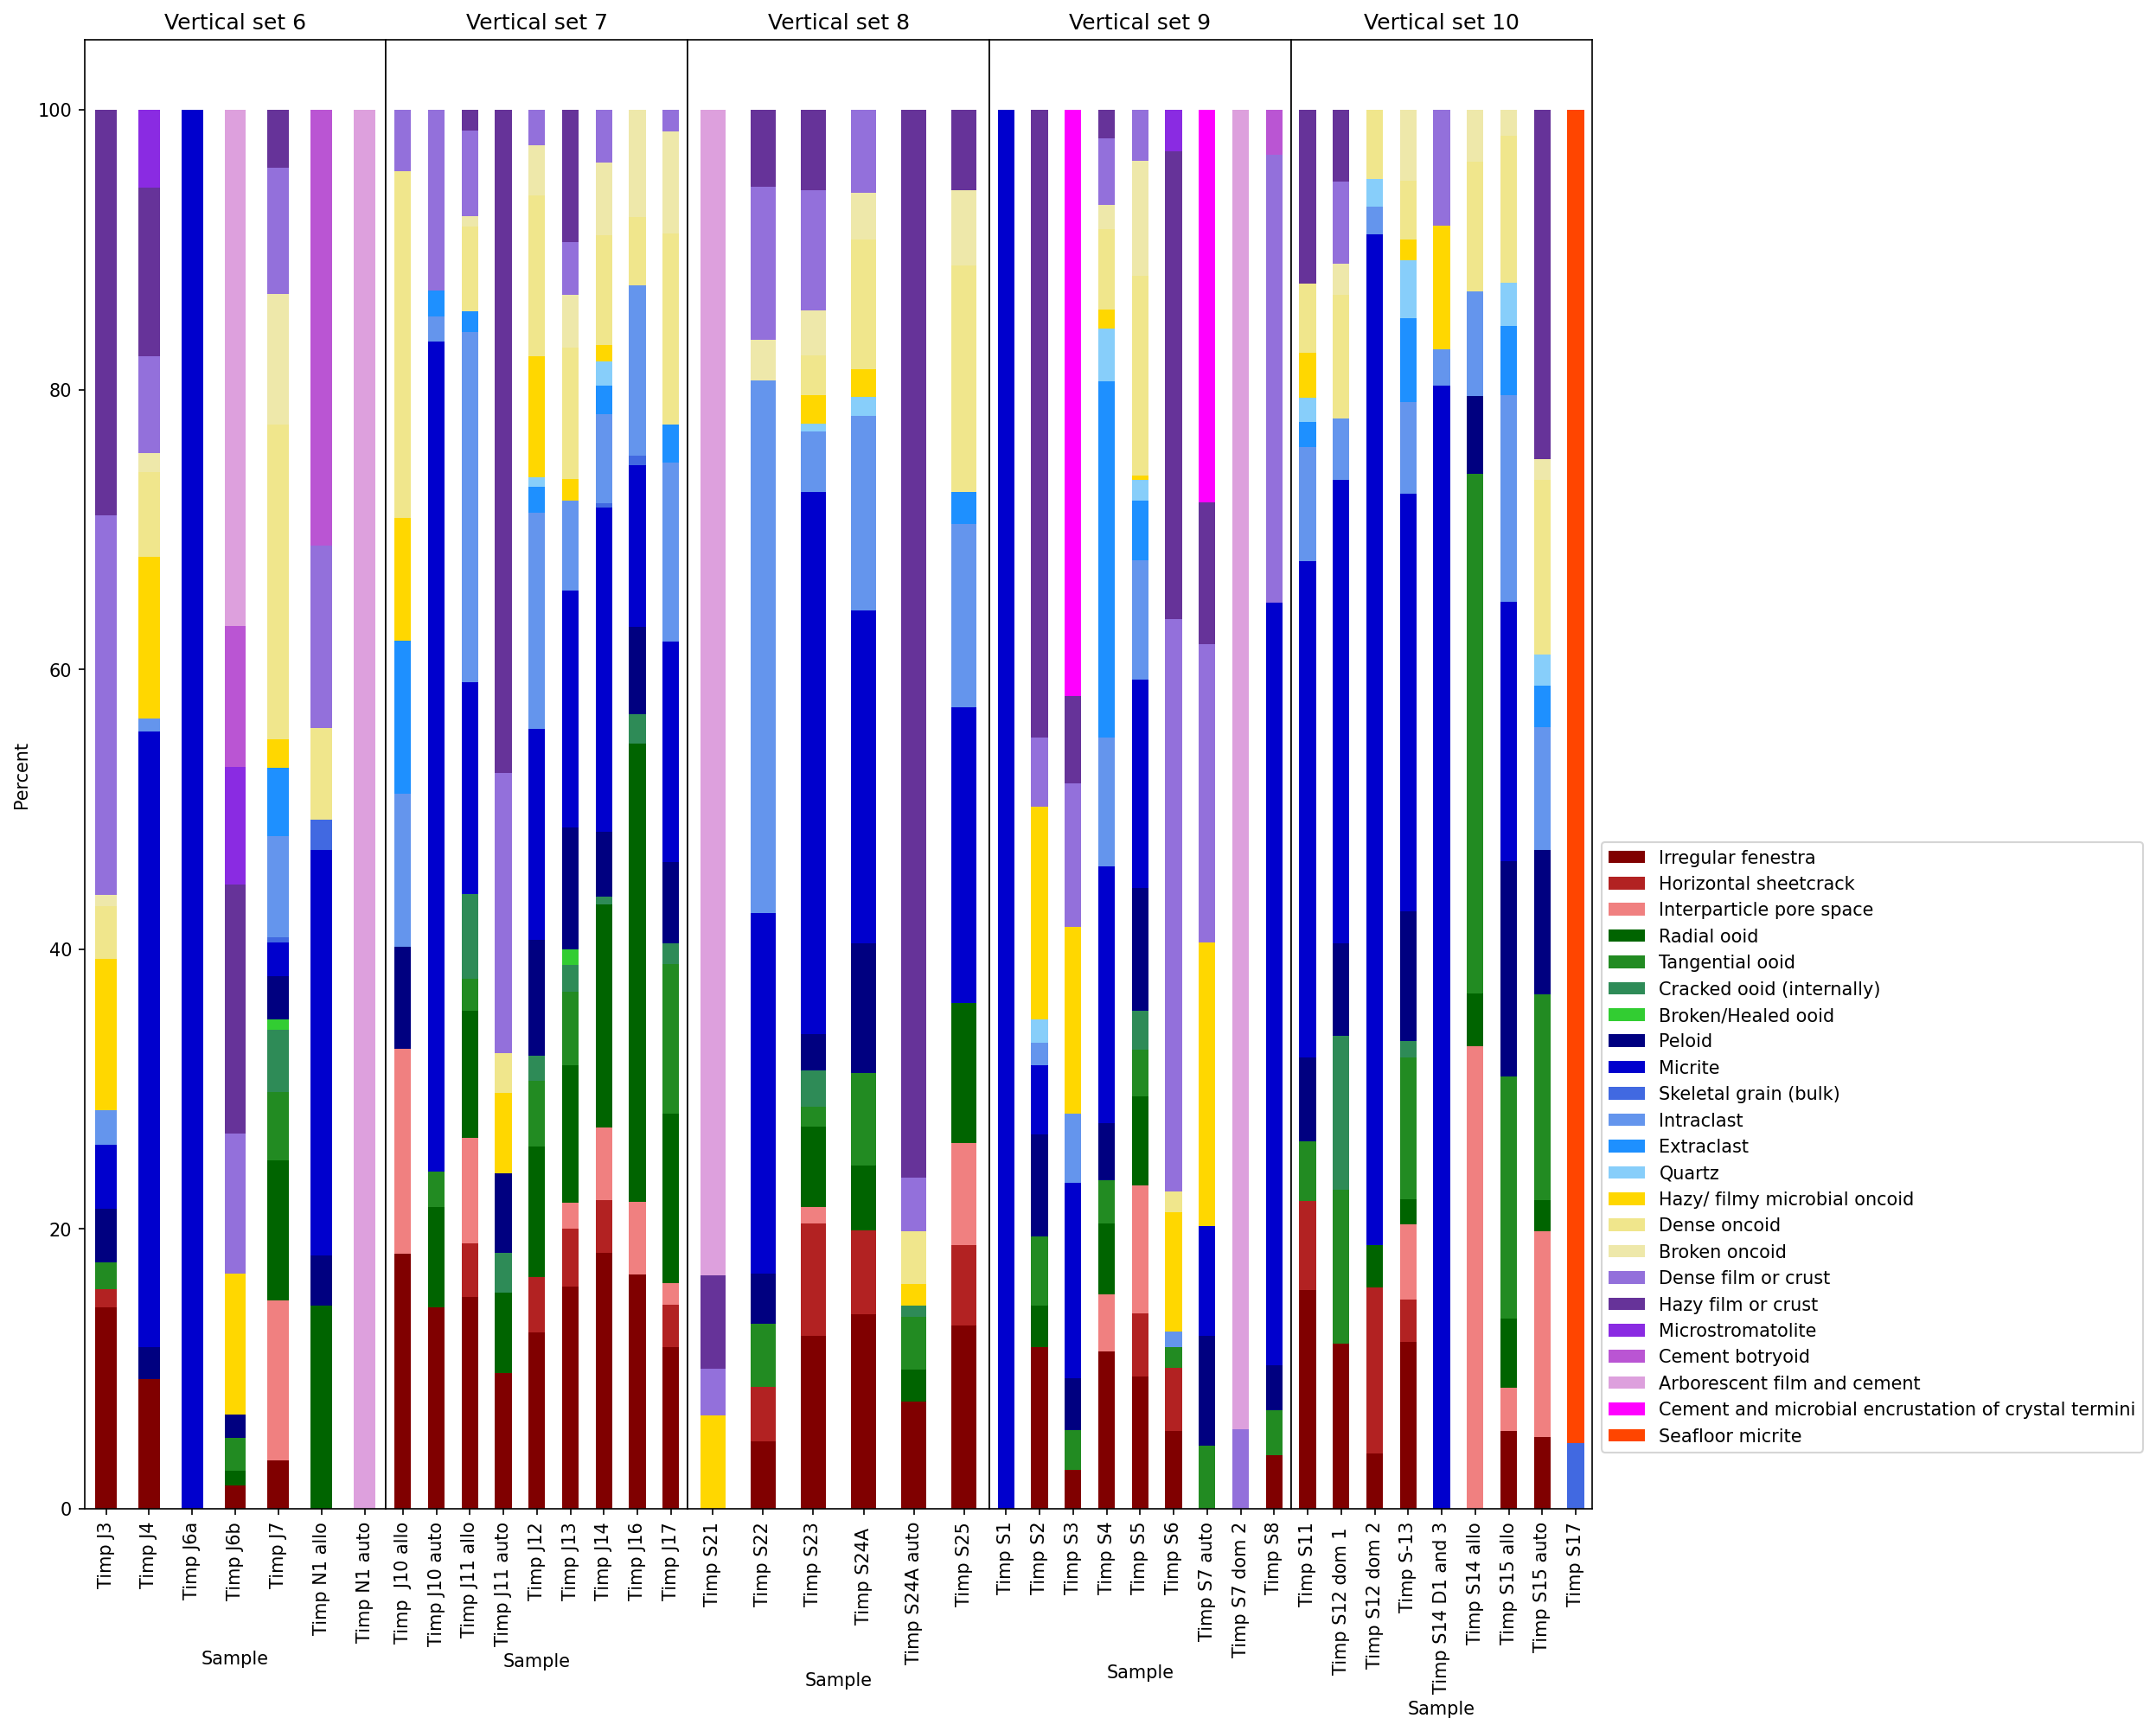

In [23]:
#set up the color groupings
data = {'col':['maroon','firebrick','lightcoral','darkgreen','forestgreen','seagreen','limegreen',\
               'navy','mediumblue','royalblue','cornflowerblue','dodgerblue','lightskyblue','gold',\
               'khaki','palegoldenrod','mediumpurple','rebeccapurple','blueviolet','mediumorchid',\
               'plum','magenta','orangered']}
sym = pd.DataFrame(data)

#set up figure axis
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,15))

fig.subplots_adjust(wspace=0,)

ver6 = dfNorm.where(df['Vertical Index'].eq(6))
ver7 = dfNorm.where(df['Vertical Index'].eq(7))
ver8 = dfNorm.where(df['Vertical Index'].eq(8))
ver9 = dfNorm.where(df['Vertical Index'].eq(9))
ver10 = dfNorm.where(df['Vertical Index'].eq(10))

ver6d = ver6.dropna(subset=['Sample'])
ver7d = ver7.dropna(subset=['Sample'])
ver8d = ver8.dropna(subset=['Sample'])
ver9d = ver9.dropna(subset=['Sample'])
ver10d = ver10.dropna(subset=['Sample'])


#order based on sample location
ver6d = ver6d.sort_values(by=['Vertical Sort Order'])
ver7d = ver7d.sort_values(by=['Vertical Sort Order'])
ver8d = ver8d.sort_values(by=['Vertical Sort Order'])
ver9d = ver9d.sort_values(by=['Vertical Sort Order'])
ver10d = ver10d.sort_values(by=['Vertical Sort Order'])

#drop sort order columns
ver6d = ver6d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
ver7d = ver7d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
ver8d = ver8d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
ver9d = ver9d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
ver10d = ver10d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])

ver6d.plot.bar(x='Sample', stacked=True, ax=ax[0], legend=False, color=sym['col'],\
               title='Vertical set 6', ylabel='Percent')
ver7d.plot.bar(x='Sample', stacked=True,ax=ax[1], legend=False, color=sym['col'],\
               title='Vertical set 7', yticks=[])
ver8d.plot.bar(x='Sample', stacked=True,ax=ax[2], legend=False, color=sym['col'],\
               title='Vertical set 8', yticks=[])
ver9d.plot.bar(x='Sample', stacked=True,ax=ax[3], legend=False, color=sym['col'],\
               title='Vertical set 9', yticks=[])
ver10d.plot.bar(x='Sample', stacked=True,ax=ax[4], legend=False, color=sym['col'],\
               title='Vertical set 10', yticks=[])

plt.legend(bbox_to_anchor =(1, .46))

# Bar charts of Core-Proximal-flank-pond

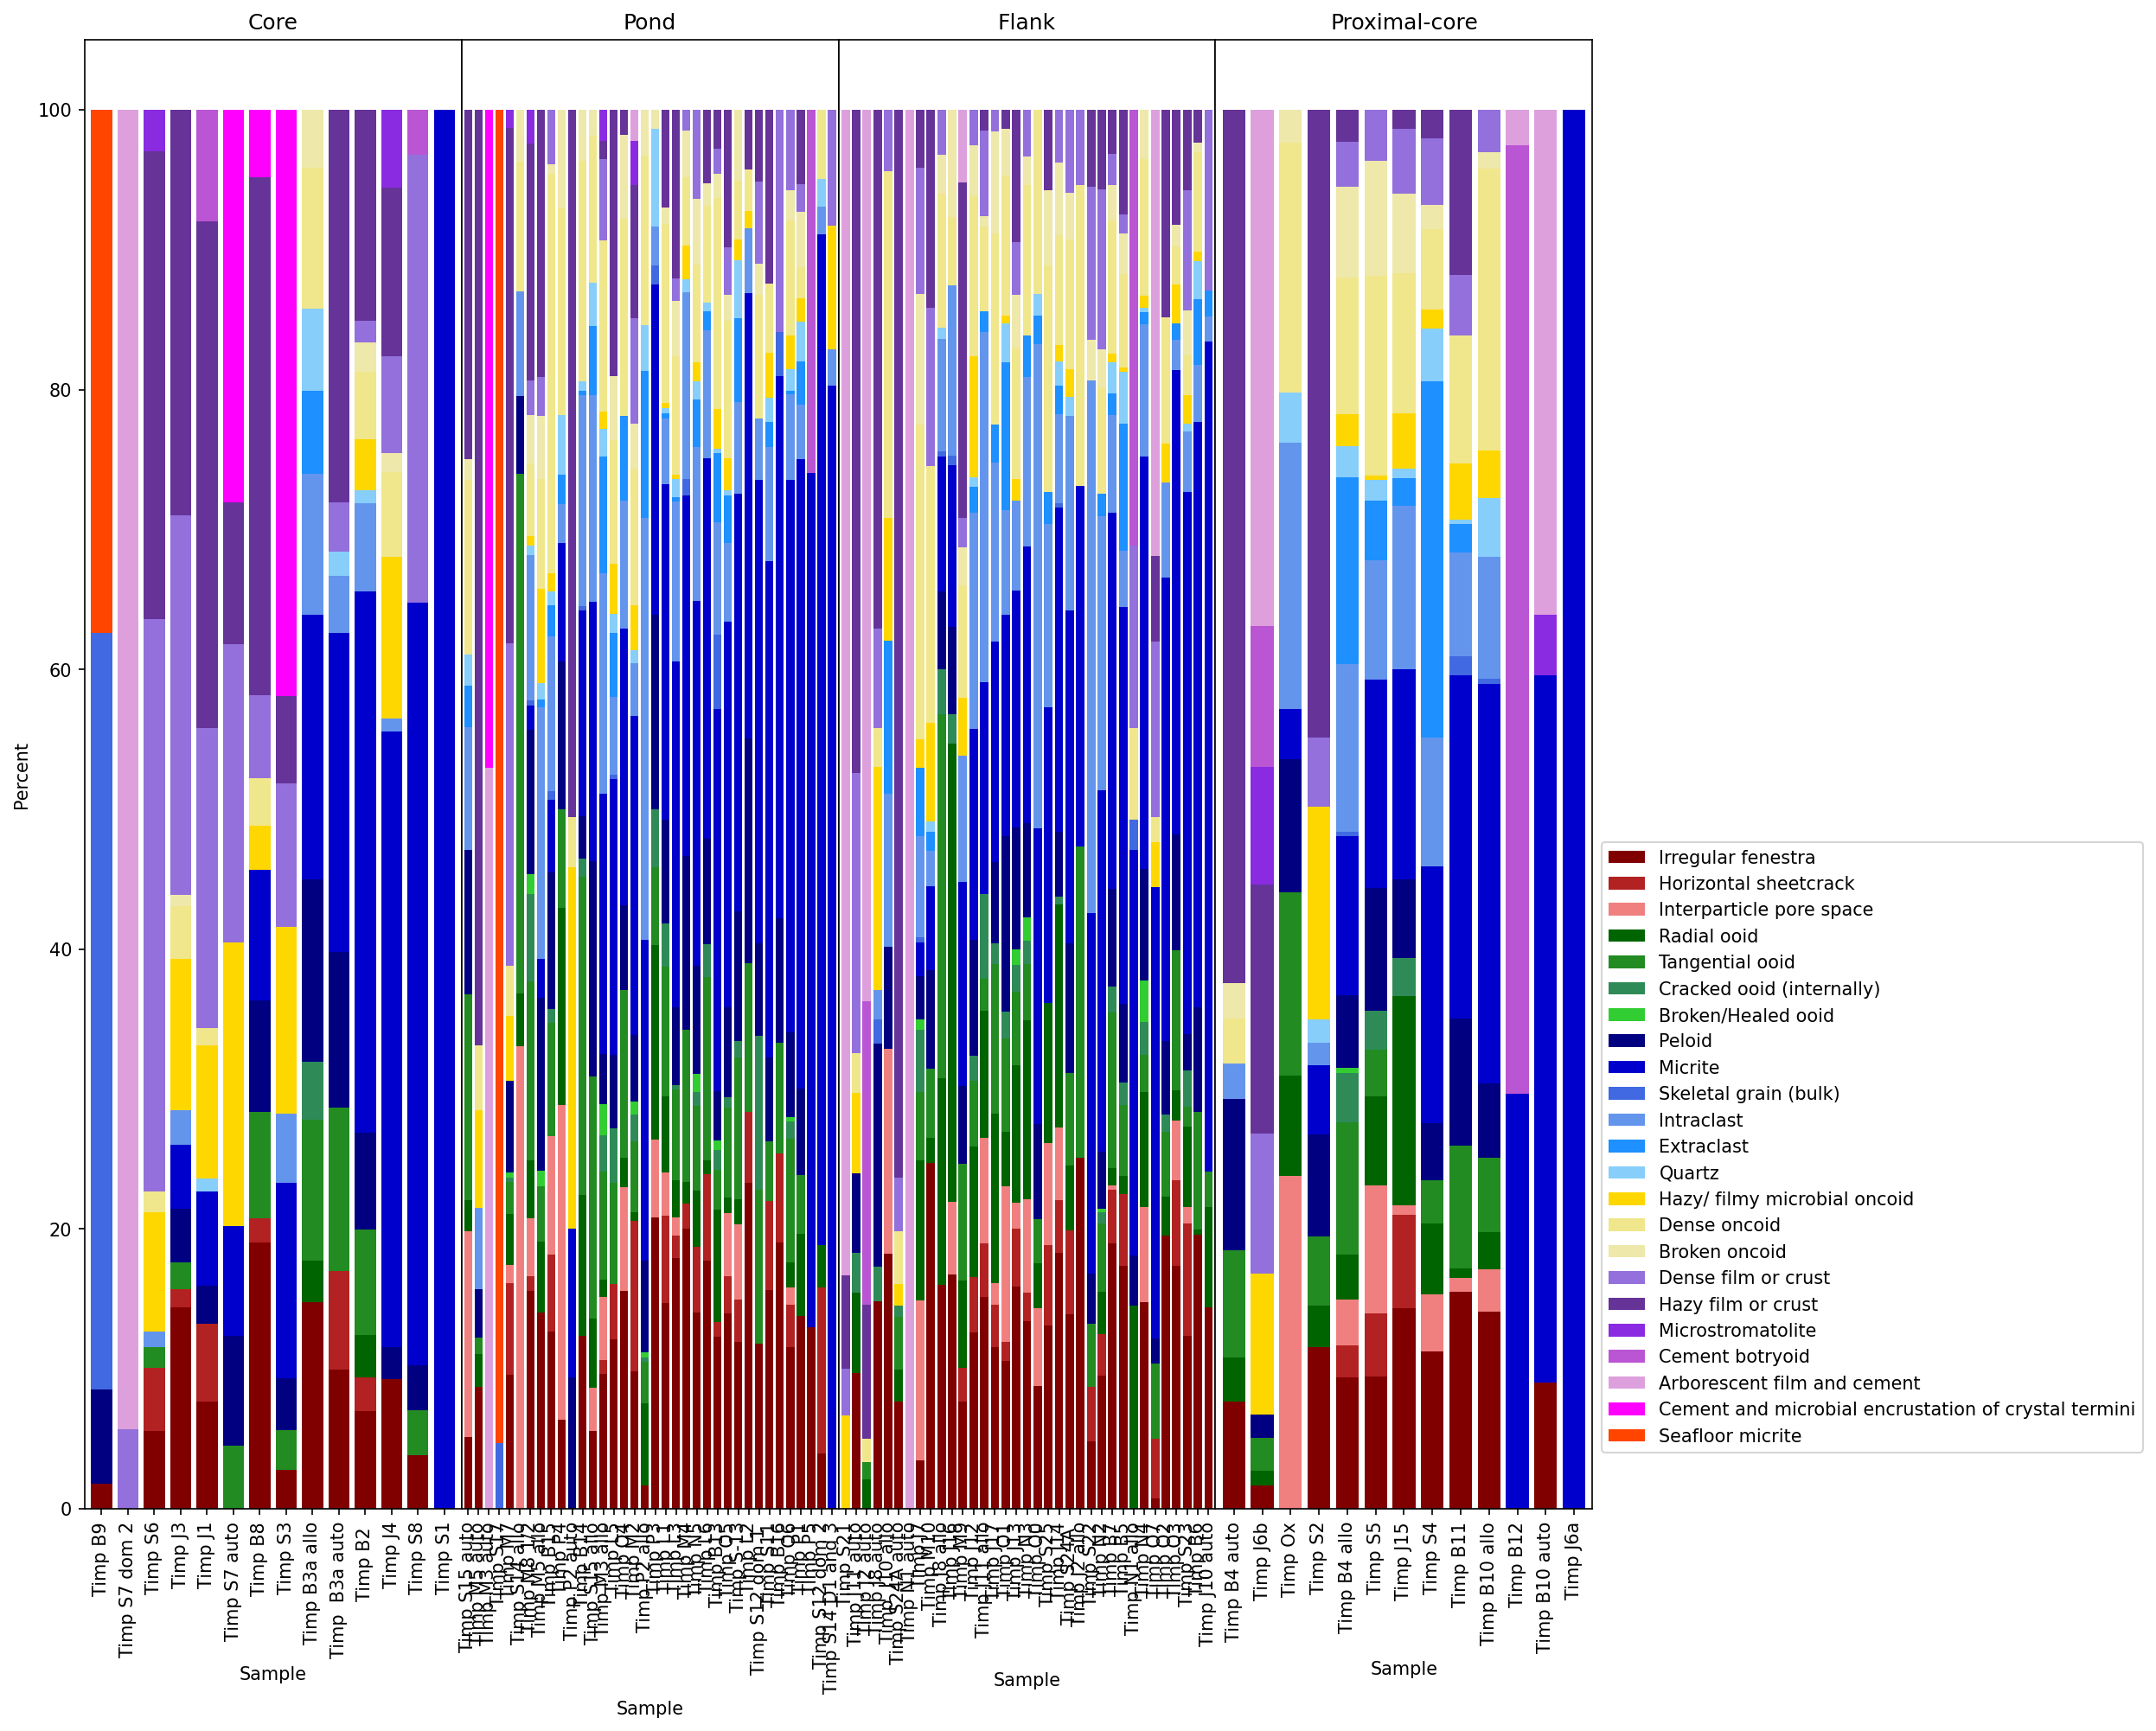

In [64]:
#set up the color groupings
data = {'col':['maroon','firebrick','lightcoral','darkgreen','forestgreen','seagreen','limegreen',\
               'navy','mediumblue','royalblue','cornflowerblue','dodgerblue','lightskyblue','gold',\
               'khaki','palegoldenrod','mediumpurple','rebeccapurple','blueviolet','mediumorchid',\
               'plum','magenta','orangered']}
sym = pd.DataFrame(data)

#set up figure axis
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15,15))

fig.subplots_adjust(wspace=0,)


lat1 = dfNorm.where(dfNorm['MorphologyV2'].eq("Core"))
lat2 = dfNorm.where(dfNorm['MorphologyV2'].eq('Pond'))
lat3 = dfNorm.where(dfNorm['MorphologyV2'].eq('Flank'))
lat4 = dfNorm.where(dfNorm['MorphologyV2'].eq('Prox'))
#lat5 = dfNorm.where(dfNorm['Lateral Index'].eq(5))

#drop nans -- this step is not working otherwise this is good to go
lat1d = lat1.dropna(subset=['Sample'])
lat2d = lat2.dropna(subset=['Sample'])
lat3d = lat3.dropna(subset=['Sample'])
lat4d = lat4.dropna(subset=['Sample'])


#order based on sample location
lat1d = lat1d.sort_values(by=['Micrite'])
lat2d = lat2d.sort_values(by=['Micrite'])
lat3d = lat3d.sort_values(by=['Micrite'])
lat4d = lat4d.sort_values(by=['Micrite'])

#drop sort order columns
lat1d = lat1d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
lat2d = lat2d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
lat3d = lat3d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])
lat4d = lat4d.drop(columns=['Lateral Sort order', 'Vertical Sort Order'])

#plot
lat1d.plot.bar(x='Sample', stacked=True, ax=ax[0], legend=False, color=sym['col'],\
               title='Core', ylabel='Percent', width=0.8)
lat2d.plot.bar(x='Sample', stacked=True,ax=ax[1], legend=False, color=sym['col'],\
               title='Pond', yticks=[], width=0.8)
lat3d.plot.bar(x='Sample', stacked=True,ax=ax[2], legend=False, color=sym['col'],\
               title='Flank', yticks=[], width=0.8)
lat4d.plot.bar(x='Sample', stacked=True,ax=ax[3], legend=False, color=sym['col'],\
               title='Proximal-core', yticks=[], width=0.8)
#lat5d.plot.bar(x='Sample', stacked=True,ax=ax[4], legend=False)

plt.legend(bbox_to_anchor =(1, .46))


In [35]:
data = {'col':['b','r','g','c','m','blueviolet','teal','palevioletred','gold',\
                      'darkgreen'],'mark':['o','s','^','p','*','d','X','>','<','v']}
sym = pd.DataFrame(data)

Text(0, 0.5, 'Percentages')

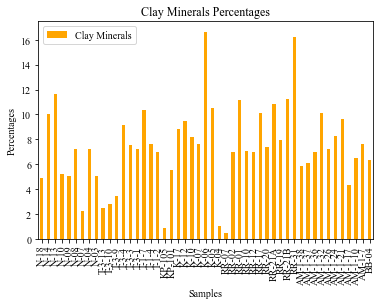

In [67]:
#plot samples collected vertically
# plotClay = dFthinSectionData.loc[:, "Clay Minerals"];
# plotClay.plot(kind="bar", stacked=True, legend=True, color="orange")
# plt.title("Clay Minerals Percentages")
# plt.xlabel("Samples")
# plt.ylabel("Percentages")

In [70]:
pip install plotly==5.5.0

Note: you may need to restart the kernel to use updated packages.


# Carbonate Ternary Diagram

In [72]:
#plot QFL on ternary diagram
import plotly.express as px
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
Quartz = dFthinSectionData.loc[:,"Quartz"]
Feldspars = dFthinSectionData.loc[:,"Feldspars"]
Litics = dFthinSectionData.loc[:,"Lithics"]
df = dFthinSectionData.loc[:, "Quartz": "Lithics"]
fig = px.scatter_ternary(df, a="Quartz", b="Feldspars", c="Lithics")
fig.show()